## File Exploration

The primary dataset (reviews.csv) includes over nine million user reviews of beer that have been published from BeerAdvocate.com – a website for craft beer reviews. Each includes sub-ratings for look, smell, taste, and feel along with an overall rating. Approximately three million reviews include textual feedback on the rated beer.  

There are two secondary datasets. The first (beers.csv) links to the beer identification code from the primary dataset and has around 360K records. It includes the name of the beer, type of beer, location, availability, and alcohol content. It also provides a brewery identification code that will be used to link to another file (breweries.csv) to get information such as the brewery name, location, and type of brewery.

The following notebook explores the data in each file.

### Explore review.csv

In [1]:
import pandas as pd

#create df from reviews
df_reviews = pd.read_csv('reviews.csv')

In [2]:
#show first rows
df_reviews.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31


In [3]:
#look at data types
df_reviews.dtypes

beer_id       int64
username     object
date         object
text         object
look        float64
smell       float64
taste       float64
feel        float64
overall     float64
score       float64
dtype: object

In [4]:
#look at the size - over 9M reviews
df_reviews.shape[0]

9073128

In [5]:
#look at the number of unique beers - about 310K unique beers
len(df_reviews.beer_id.unique())

309542

In [6]:
#look at unique user - around 16.5K
len(df_reviews.username.unique())

164935

<Axes: >

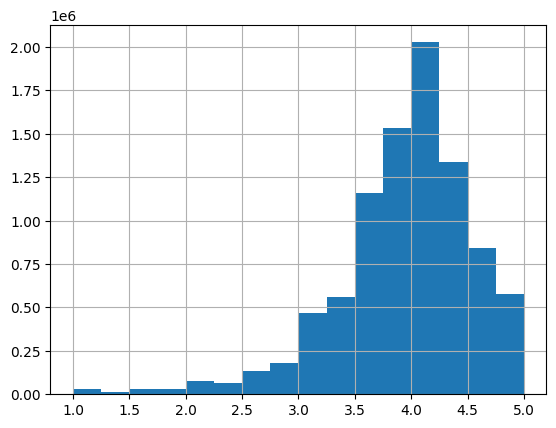

In [7]:
#histogram of the review scores - it might be interesting to see make makes a beer move from good to great
df_reviews.score.hist(bins=16)

array([[<Axes: title={'center': 'beer_id'}>,
        <Axes: title={'center': 'look'}>,
        <Axes: title={'center': 'smell'}>],
       [<Axes: title={'center': 'taste'}>,
        <Axes: title={'center': 'feel'}>,
        <Axes: title={'center': 'overall'}>],
       [<Axes: title={'center': 'score'}>, <Axes: >, <Axes: >]],
      dtype=object)

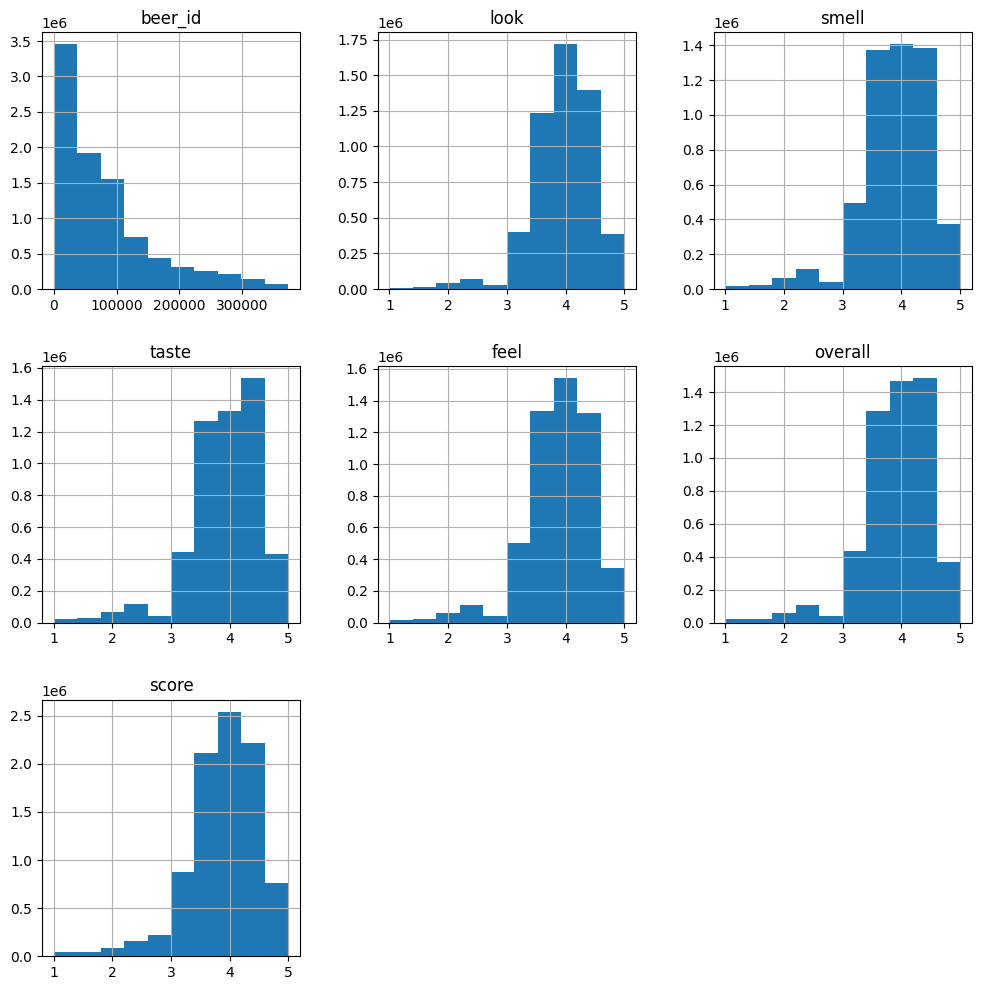

In [8]:
df_reviews.hist(figsize = (12,12))

In [9]:
#correlation matrix on the reviews - taste is most correlated with score but might be good to investigate
df_reviews[['beer_id','look','smell','taste','feel','overall','score']].corr()

,beer_id,look,smell,taste,feel,overall,score
beer_id,1.000000,0.125119,0.159668,0.121640,0.139868,0.111503,0.103638
look,0.125119,1.000000,0.669152,0.648267,0.676017,0.663568,0.737329
smell,0.159668,0.669152,1.000000,0.783019,0.716932,0.765744,0.890562
taste,0.121640,0.648267,0.783019,1.000000,0.804965,0.884450,0.965028
feel,0.139868,0.676017,0.716932,0.804965,1.000000,0.811951,0.867209
overall,0.111503,0.663568,0.765744,0.884450,0.811951,1.000000,0.935095
score,0.103638,0.737329,0.890562,0.965028,0.867209,0.935095,1.000000


In [10]:
#check for missing (NaN) values
df_reviews.isnull().sum(axis=0)

beer_id           0
username       3815
date              0
text              0
look        3790018
smell       3790018
taste       3790018
feel        3790018
overall     3790018
score             0
dtype: int64

In [11]:
#empty reviews contain '\xa0\xa0' - 6M empty reviews so we have 3M to analyze text
(df_reviews['text'] == '\xa0\xa0').sum()

6085135

### Explore beers.csv

In [12]:
#create df from beers
df_beers = pd.read_csv('beers.csv')

In [13]:
#show first rows
df_beers.head()

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t
3,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f
4,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f


In [14]:
#look at data types
df_beers.dtypes

id                int64
name             object
brewery_id        int64
state            object
country          object
style            object
availability     object
abv             float64
notes            object
retired          object
dtype: object

In [15]:
#look at the size - around 360K beers
df_beers.shape

(358873, 10)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'brewery_id'}>],
       [<Axes: title={'center': 'abv'}>, <Axes: >]], dtype=object)

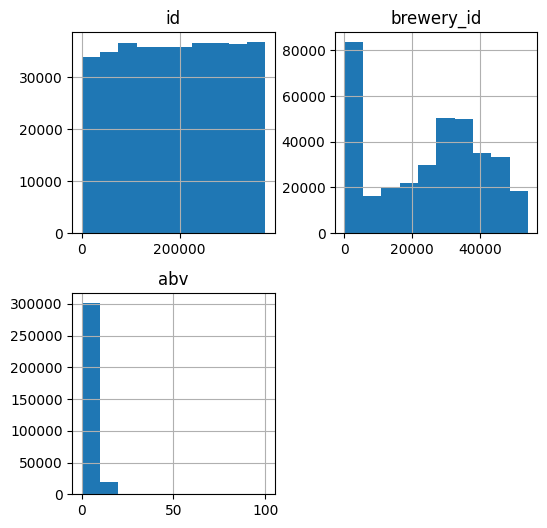

In [16]:
#look at histrograms in the data
df_beers.hist(figsize = (6,6))

In [17]:
#look at the unique availability categories
df_beers.availability.unique()

array([' Rotating', ' Year-round', ' Winter', ' Limited (brewed once)',
       ' Spring', ' Summer', ' Fall', ' Fall ', ' Year-round ',
       ' Summer ', ' Limited (brewed once) ', ' Rotating ', ' Winter ',
       'Rotating', 'Year-round', 'Limited (brewed once)', 'Summer',
       'Fall', 'Spring', 'Winter'], dtype=object)

In [18]:
#check the counts - looks like we may need to conoslidate here (ex. Roatating is listed 3 times)
df_beers.availability.value_counts()

 Rotating                  98776
 Limited (brewed once)     72047
 Year-round                56800
Rotating                   48002
Limited (brewed once)      34798
Year-round                 19744
 Winter                     6427
 Fall                       5908
 Summer                     5136
 Spring                     3349
Fall                        2310
Winter                      2293
Summer                      1973
Spring                      1286
 Limited (brewed once)         9
 Rotating                      6
 Year-round                    4
 Fall                          3
 Winter                        1
 Summer                        1
Name: availability, dtype: int64

In [19]:
#check for the number of unique beer styles in the data - 113 different styles
len(df_beers['style'].unique())

113

In [20]:
#list the different styles and their count - American IPA has the most with 45K beers (my favorite BTW)
df_beers['style'].value_counts()

American IPA                       44719
American Pale Ale (APA)            22159
American Imperial IPA              18338
Belgian Saison                     18167
American Wild Ale                  12972
                                   ...  
Japanese Happoshu                    123
Finnish Sahti                        123
Bière de Champagne / Bière Brut      116
Belgian Faro                          32
Wild/Sour Beers                        4
Name: style, Length: 112, dtype: int64

In [21]:
#check the number of beers by country - US has the most with 265K beers
df_beers.country.value_counts()

US    265461
CA     21522
GB     13923
DE      6888
BE      5253
       ...  
PY         1
LY         1
YT         1
GQ         1
NE         1
Name: country, Length: 193, dtype: int64

In [22]:
#check which states have the most beers - CA with 34K
df_beers.state.value_counts()

CA    33649
PA    17083
NY    14572
CO    14182
MI    12690
      ...  
MB      171
PE       98
YT       86
NL       77
NT        4
Name: state, Length: 67, dtype: int64

### Explore breweries.csv

In [23]:
#create dataframe from breweries 
df_breweries = pd.read_csv('breweries.csv')

In [24]:
#look at the first few rows
df_breweries.head()

,id,name,city,state,country,notes,types
0,19730,Brouwerij Danny,Erpe-Mere,NaN,BE,No notes at this time.,Brewery
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
2,44736,Beef 'O' Brady's,Plant City,FL,US,No notes at this time.,"Bar, Eatery"
3,23372,Broadway Wine Merchant,Oklahoma City,OK,US,No notes at this time.,Store
4,35328,Brighton Beer Dispensary (DUPLICATE),Brighton,GB2,GB,Duplicate of https://www.beeradvocate.com/beer...,"Bar, Eatery"


In [25]:
#look at the data types
df_breweries.dtypes

id          int64
name       object
city       object
state      object
country    object
notes      object
types      object
dtype: object

In [26]:
#check the size - there are 50K breweries listed
df_breweries.shape

(50347, 7)

In [27]:
#check the county in each country - US has the most with 35K
df_breweries.country.value_counts()

US    34693
GB     2525
CA     1890
DE     1812
BE      756
      ...  
LY        1
CV        1
TJ        1
ML        1
ZM        1
Name: country, Length: 199, dtype: int64

In [28]:
#check which state has the most breweries - CA with 3.6K
df_breweries.state.value_counts()

CA     3638
PA     2454
NY     2284
GB2    2152
FL     1595
       ... 
MB       36
NL       23
PE        7
YT        3
NT        1
Name: state, Length: 67, dtype: int64

In [29]:
#look at the count of "types" - most are classified as "Bar, Eatery", may need to consolidate these
df_breweries.types.value_counts()

Bar, Eatery                                   13573
Store                                          9726
Brewery                                        8005
Brewery, Bar, Eatery                           2801
Bar, Eatery, Beer-to-go                        2789
Brewery, Bar, Beer-to-go                       2670
Bar                                            2466
Brewery, Bar, Eatery, Beer-to-go               2370
Brewery, Bar                                   1360
Bar, Beer-to-go                                1258
Homebrew                                        806
Brewery, Beer-to-go                             755
Brewery, Eatery                                 671
Eatery, Beer-to-go                              272
Homebrew, Beer-to-go                            224
Eatery                                          186
Brewery, Eatery, Beer-to-go                      93
Bar, Homebrew, Beer-to-go                        61
Brewery, Bar, Homebrew, Beer-to-go               52
Brewery, Bar